## Under Sampling with RepeatedEditedNearestNeighbours Method

Extends Edited Nearest neighbours in that it repeats the procedure over an over, until no further observation is removed from the dataset, or alternatively until a maximum number of iterations is reached.

Briefly:

1) Train a KNN algorithm on the entire dataset, and find the 3 closest neighbours (user can decide how many neighbours to examine)

2) Check all observations from majority class and remove observations if its class is different from that of its neighbour

3) Repeat 1 and 2 over the remaining data

This procedure always looks at the same number of neighbours.

In [94]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# for metrics
from sklearn.metrics import roc_auc_score

# from imblearn
from imblearn.under_sampling import RepeatedEditedNearestNeighbours

## create simulated data

In [95]:
def create_data(sep):
    
    X,y = make_classification(n_samples=1000,
                              n_features=2,
                              n_redundant=0,
                              n_clusters_per_class=1,
                              weights=[0.99],
                              class_sep=sep,
                              random_state=1)
    
    X = pd.DataFrame(X, columns=['varA','varB'])
    y = pd.Series(y)
    
    return X,y

## resample using OneSidedSelection method

In [96]:
# lets generate data when sep = 2
X,y = create_data(sep=2)

In [97]:
X.shape, y.shape

((1000, 2), (1000,))

In [98]:
y.value_counts()

0    983
1     17
dtype: int64

In [99]:
renn = RepeatedEditedNearestNeighbours(sampling_strategy='auto', # removes from the majority class
                              n_neighbors=3,            # setting the nearest neighbours count
                              kind_sel='all',           # removing strategy -- set to all -- all observations must agree
                              n_jobs=2,
                                     max_iter=100)      # this sets the maximum no of iterations

X_res, y_res = renn.fit_resample(X,y)
print('Resample Data Shapes: ')
print(X_res.shape, y_res.shape)
print('Value Counts: ')
print(y_res.value_counts())

Resample Data Shapes: 
(967, 2) (967,)
Value Counts: 
0    950
1     17
dtype: int64


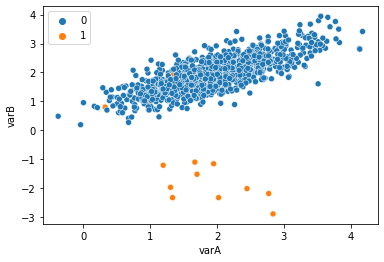

In [100]:
# original data plot
sns.scatterplot(data=X, x = 'varA', y ='varB', hue=y)
plt.show()

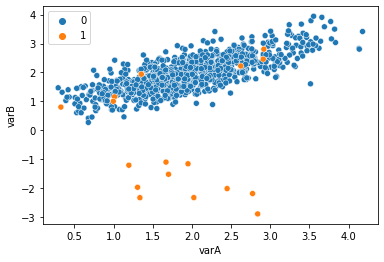

In [101]:
# under sampled data plot
sns.scatterplot(data=X_res, x = 'varA', y ='varB', hue=y_res)
plt.show()

We dont see much reduction in the number of majority class observations as the classes are already separated well. Lets try checking with a very less separated classes data.

## Lets check for a partially separated class

In [103]:
X,y = create_data(sep=0)

In [104]:
renn = RepeatedEditedNearestNeighbours(sampling_strategy='auto', # removes from the majority class
                              n_neighbors=3,            # setting the nearest neighbours count
                              kind_sel='all',           # removing strategy -- set to all -- all observations must agree
                              n_jobs=2,
                                     max_iter=100)

X_res, y_res = renn.fit_resample(X,y)
print('Resample Data Shapes: ')
print(X_res.shape, y_res.shape)
print('Value Counts: ')
print(y_res.value_counts())

Resample Data Shapes: 
(940, 2) (940,)
Value Counts: 
0    923
1     17
dtype: int64


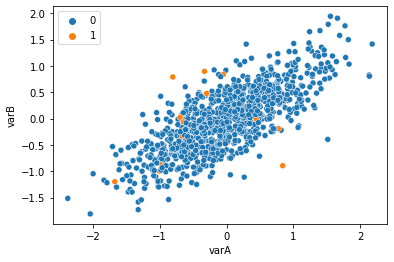

In [105]:
# original data plot
sns.scatterplot(data=X, x = 'varA', y ='varB', hue=y)
plt.show()

# we can very less separation and much overlapped since we provide a lower seperation value 

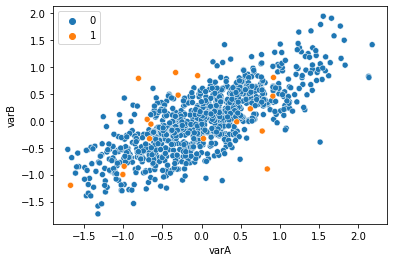

In [106]:
# under sampled data plot
sns.scatterplot(data=X_res, x = 'varA', y ='varB', hue=y_res)
plt.show()

- Here, we can see more number of oberservations of majority class are removed as the observations are closer.

## Different KNN values
### with mode = 'all'

In [107]:
def create_resampled_data(knn,X,y):
    renn = RepeatedEditedNearestNeighbours(sampling_strategy='auto', # removes from the majority class
                              n_neighbors=knn,            # setting the nearest neighbours count
                              kind_sel='all',           # removing strategy -- set to all -- all observations must agree
                              n_jobs=2,
                                max_iter=100)

    X_res, y_res = renn.fit_resample(X,y)
    print('Resample Data Shapes for knn = {}'.format(knn))
    print(X_res.shape, y_res.shape)
    print('Value Counts: ')
    print(y_res.value_counts())

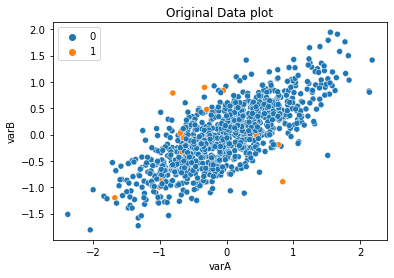

Resample Data Shapes for knn = 1
(978, 2) (978,)
Value Counts: 
0    961
1     17
dtype: int64


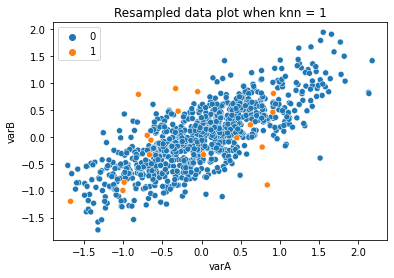

Resample Data Shapes for knn = 2
(955, 2) (955,)
Value Counts: 
0    938
1     17
dtype: int64


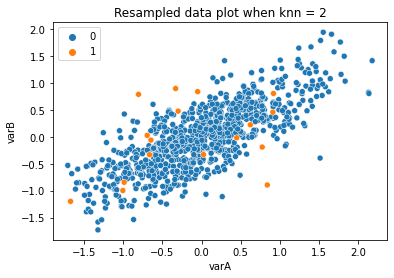

Resample Data Shapes for knn = 3
(940, 2) (940,)
Value Counts: 
0    923
1     17
dtype: int64


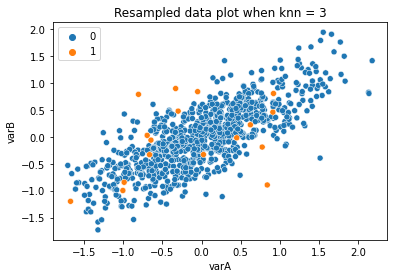

Resample Data Shapes for knn = 4
(921, 2) (921,)
Value Counts: 
0    904
1     17
dtype: int64


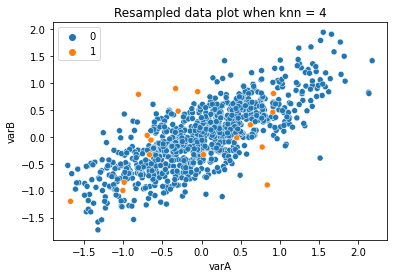

In [108]:
# when sep = 0
X, y = create_data(sep=0)

# original data plot
sns.scatterplot(data=X, x = 'varA', y ='varB', hue=y)
plt.title('Original Data plot')
plt.show()

for i in range(1,5):
    create_resampled_data(i,X,y)    
    # resampled data plot
    sns.scatterplot(data=X_res, x = 'varA', y ='varB', hue=y_res)
    plt.title('Resampled data plot when knn = {}'.format(i))
    plt.show()
    

- We can see the reduction of observations count in the under sampled data is more with higher knn values

### with mode = 'mode'
- When most of the neighbours agree or matched with the observation in check

In [109]:
renn = RepeatedEditedNearestNeighbours(sampling_strategy='auto', # removes from the majority class
                              n_neighbors=3,            # setting the nearest neighbours count
                              kind_sel='mode',           # removing strategy -- set to all -- all observations must agree
                              n_jobs=2,
                                     max_iter=100)

X_res, y_res = renn.fit_resample(X,y)
print('Resample Data Shapes: ')
print(X_res.shape, y_res.shape)
print('Value Counts: ')
print(y_res.value_counts())

Resample Data Shapes: 
(997, 2) (997,)
Value Counts: 
0    980
1     17
dtype: int64


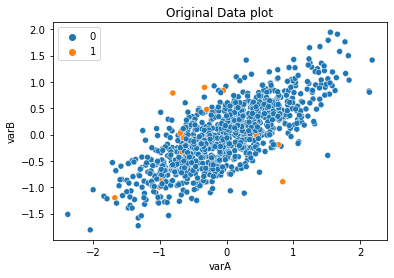

Resample Data Shapes for knn = 1
(978, 2) (978,)
Value Counts: 
0    961
1     17
dtype: int64


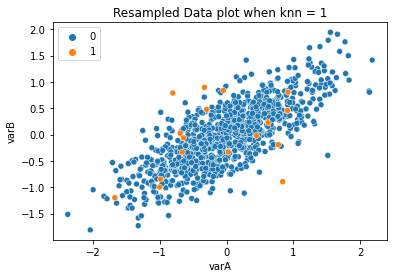

Resample Data Shapes for knn = 2
(955, 2) (955,)
Value Counts: 
0    938
1     17
dtype: int64


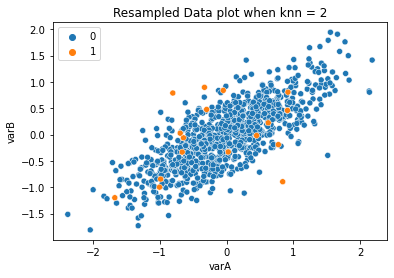

Resample Data Shapes for knn = 3
(940, 2) (940,)
Value Counts: 
0    923
1     17
dtype: int64


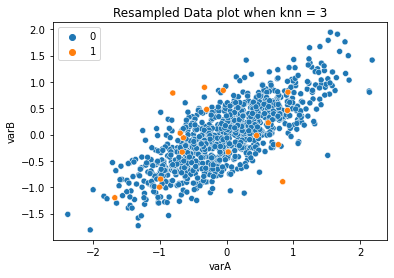

Resample Data Shapes for knn = 4
(921, 2) (921,)
Value Counts: 
0    904
1     17
dtype: int64


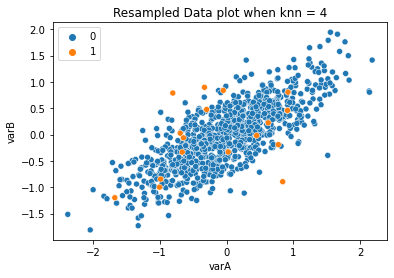

In [110]:
# when sep = 0
X, y = create_data(sep=0)

# original data plot
sns.scatterplot(data=X, x = 'varA', y ='varB', hue=y)
plt.title('Original Data plot')
plt.show()

for i in range(1,5):
    create_resampled_data(i,X,y)    
    # resampled data plot
    sns.scatterplot(data=X_res, x = 'varA', y ='varB', hue=y_res)
    plt.title('Resampled Data plot when knn = {}'.format(i))
    plt.show()
    

- dont see much difference.

## Working on a real data

In [111]:
# sampling to only 10000 observations to speed up the computation
df = pd.read_csv('kdd2004.csv').sample(10000)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
71488,96.79,20.85,0.89,71.5,-30.5,1374.7,0.74,0.50,16.0,-92.5,...,857.5,0.36,-0.71,6.0,-93.0,118.7,2.14,0.32,-0.16,-1
49175,70.05,28.26,1.07,-61.0,18.0,2164.2,-0.09,0.75,-13.0,-78.0,...,2465.1,0.71,1.10,11.0,-62.0,1045.6,-0.89,0.20,0.03,-1
105495,44.00,29.79,0.00,-16.5,-24.0,443.3,0.39,-0.85,-4.0,-52.5,...,307.7,0.38,1.85,5.0,-28.0,96.3,-0.07,0.02,-0.78,-1
140644,66.01,25.74,-0.90,-31.5,13.0,955.6,0.02,2.16,8.0,-80.5,...,276.2,1.95,-0.20,-32.0,-58.0,87.3,1.77,0.63,0.71,-1
61776,34.10,36.49,0.59,25.5,-37.0,2903.0,-1.67,0.22,-27.0,-100.0,...,982.1,2.65,-1.03,-7.0,-69.0,451.4,0.68,0.63,0.55,-1


In [112]:
df.shape

(10000, 75)

In [113]:
# check the target values ratios
df['target'].value_counts()

-1    9909
 1      91
Name: target, dtype: int64

In [114]:
df['target'].value_counts()/len(df)

-1    0.9909
 1    0.0091
Name: target, dtype: float64

## split the data

In [115]:
X_train, X_test, y_train,y_test = train_test_split(df.drop('target', axis = 1),
                                                  df['target'],
                                                  test_size=0.3,
                                                  random_state=0)
X_train.shape, X_test.shape

((7000, 74), (3000, 74))

In [116]:
# now lets prepare our under resampled data sets
enn = RepeatedEditedNearestNeighbours(sampling_strategy='auto', # removes from the majority class
                              n_neighbors=3,            # setting the nearest neighbours count
                              kind_sel='all',           # removing strategy -- set to all -- all observations must agree
                              n_jobs=2,
                                     max_iter=100)

X_enn, y_enn = enn.fit_resample(X_train, y_train)
X_enn.shape, y_enn.shape

((6882, 74), (6882,))

In [117]:
# target value ratio
y_enn.value_counts()

-1    6817
 1      65
Name: target, dtype: int64

## plot and compare

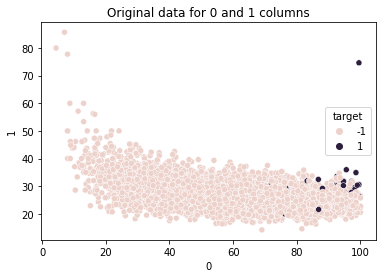

In [118]:
# original dataset

sns.scatterplot(data= X_train, x='0', y = '1', hue=y_train)
plt.title('Original data for 0 and 1 columns')
plt.show()

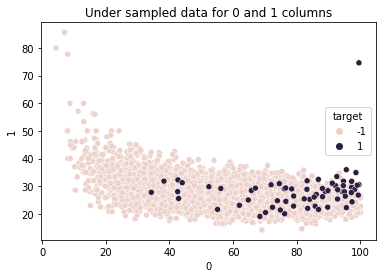

In [119]:
# onesided under sampled dataset

sns.scatterplot(data= X_enn, x='0', y = '1', hue=y_enn)
plt.title('Under sampled data for 0 and 1 columns')
plt.show()

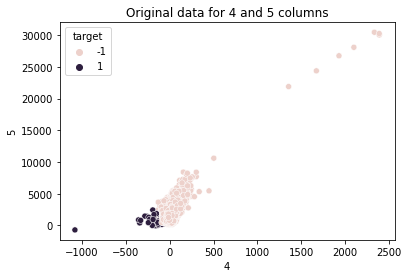

In [120]:
# original dataset

sns.scatterplot(data= X_train, x='4', y = '5', hue=y_train)
plt.title('Original data for 4 and 5 columns')
plt.show()

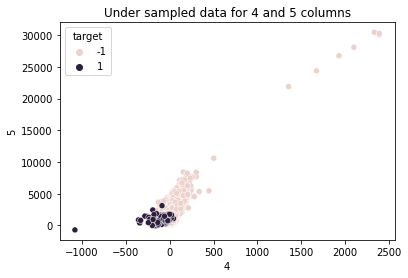

In [121]:
# condensed under sampled dataset

sns.scatterplot(data= X_enn, x='4', y = '5', hue=y_enn)
plt.title('Under sampled data for 4 and 5 columns')
plt.show()

## Model performance on original and condensed resample data

In [122]:
def create_randomForest(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=200,
                                n_jobs=2,
                                random_state=39,
                                max_depth=4)
    
    rf.fit(X_train, y_train)
    probs_train = rf.predict_proba(X_train)
    probs_test = rf.predict_proba(X_test)
    
    # get metrics
    print('roc auc score for train data: {}'.format(roc_auc_score(y_train, probs_train[:,1])))
    print('roc auc score for test data: {}'.format(roc_auc_score(y_test, probs_test[:,1])))

In [123]:
# for Original DataSet
create_randomForest(X_train, X_test, y_train, y_test)

roc auc score for train data: 0.9897398924075205
roc auc score for test data: 0.9667438311520357


In [124]:
# for condensed dataset
create_randomForest(X_enn, X_test, y_enn, y_test)

roc auc score for train data: 0.9931302964308685
roc auc score for test data: 0.9713478350835445


## On SVM classifier

In [125]:
def create_svc(X_train, X_test, y_train, y_test):
    
    svc = SVC(max_iter=1000, random_state=0, probability=True)
    
    svc.fit(X_train, y_train)
    probs_train = svc.predict_proba(X_train)
    probs_test = svc.predict_proba(X_test)
    
    # get metrics
    print('roc auc score for train data: {}'.format(roc_auc_score(y_train, probs_train[:,1])))
    print('roc auc score for test data: {}'.format(roc_auc_score(y_test, probs_test[:,1])))

In [126]:
# for original data
create_svc(X_train, X_test, y_train, y_test)

roc auc score for train data: 0.9083600465864344
roc auc score for test data: 0.9787646784956805


In [127]:
# for condensed dataset
create_svc(X_enn, X_test, y_enn, y_test)

roc auc score for train data: 0.9118335383261305
roc auc score for test data: 0.9755056644767471


## Logistic Regression

In [128]:
def create_log(X_train, X_test, y_train, y_test):
    
    log = LogisticRegressionCV(max_iter=10000, random_state=0, solver='saga', n_jobs=2)
    
    log.fit(X_train, y_train)
    probs_train = log.predict_proba(X_train)
    probs_test = log.predict_proba(X_test)
    
    # get metrics
    print('roc auc score for train data: {}'.format(roc_auc_score(y_train, probs_train[:,1])))
    print('roc auc score for test data: {}'.format(roc_auc_score(y_test, probs_test[:,1])))

In [129]:
# for original data
create_log(X_train, X_test, y_train, y_test)

roc auc score for train data: 0.9316887582496811
roc auc score for test data: 0.9459158864000828


In [130]:
# for condensed dataset
create_log(X_enn, X_test, y_enn, y_test)

roc auc score for train data: 0.9357849719592422
roc auc score for test data: 0.9458512234235167


- Overall model performance on the resampled data seems to be almost the same on the original data
- Random Forest performs better than the rest of the models, but not sure it is because of the under sampling or due to the randomness of the RF
- We can check with the 'mode' selection mode

In [131]:
# create a function to create condensed under sampled data and check the metrics

def create_undersampled_data(X_train, X_test,y_train,y_test):
    enn = RepeatedEditedNearestNeighbours(sampling_strategy='auto', # removes from the majority class
                                  n_neighbors=3,            # setting the nearest neighbours count
                                  kind_sel='all',           # removing strategy -- set to all -- all observations must agree
                                  n_jobs=2,
                                 max_iter=100)

    X_res, y_res = enn.fit_resample(X_train,y_train)
    # for original data
    print("*******************")
    print('Metrics for Original Data: ')
    create_randomForest(X_train, X_test, y_train, y_test)
    # for condensed data
    print('Metrics for resampled Data: ')
    create_randomForest(X_res, X_test, y_res, y_test)

In [132]:
# trying for knn = 1,2 and 3
create_undersampled_data(X_train, X_test,y_train,y_test)

*******************
Metrics for Original Data: 
roc auc score for train data: 0.9897398924075205
roc auc score for test data: 0.9667438311520357
Metrics for resampled Data: 
roc auc score for train data: 0.9931302964308685
roc auc score for test data: 0.9713478350835445


- The model seems to perform almost the same for both the mode in our resampled data set.